In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import lilliefors #Kolmogorov-Smirnov normality test
import scipy.stats as scs # QQ plot
from statsmodels.compat import lzip # Homocedascity test
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load wine dataset
import sklearn.datasets
wine_tuple = sklearn.datasets.load_wine()
wine_tuple.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [27]:
# Create dataframe
wine = pd.DataFrame(wine_tuple.data, columns=wine_tuple.feature_names)
wine.rename(columns={'od280/od315_of_diluted_wines': 'test_diluted_wines'}, inplace=True)
wine["target"] = wine_tuple.target

In [29]:
# Verify null values
wine.isnull().sum()

alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
test_diluted_wines      0
proline                 0
target                  0
dtype: int64

In [43]:
# Create linear model formula
lm_formula = list(wine.columns)[-1] + " ~ " + " + ".join(list(wine.columns)[:-1])

In [50]:
# Create model
model = smf.ols(lm_formula, wine).fit()

In [52]:
# Get residuals
res = model.resid

In [53]:
# Residuals normality tests

# Kolmogorov-Smirnov test
_, p = lilliefors(res, dist='norm')
print('Not normal | p-value:' if p < 0.05 else 'Normal | p-value:', p)
print('-------------------------------')

 # Anderson
stat, p3, _ = scs.anderson(res, dist='norm')
print('Anderson:')
print('Not normal | stat:' if stat > p3[2] else 'Normal | stat:', stat, ':: p-value:', p3[2])

Normal | p-value: 0.48907680782480767
-------------------------------
Anderson:
Normal | stat: 0.3454707176863394 :: p-value: 0.77


<AxesSubplot:>

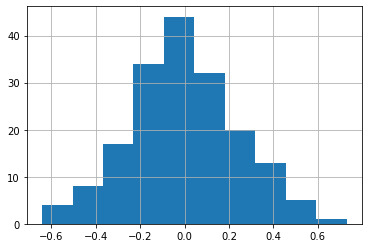

In [54]:
model.resid.hist()

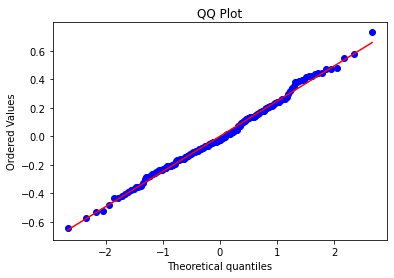

In [56]:
# QQPlot
scs.probplot(res, dist='norm', plot=plt)
plt.title('QQ Plot')
plt.show()

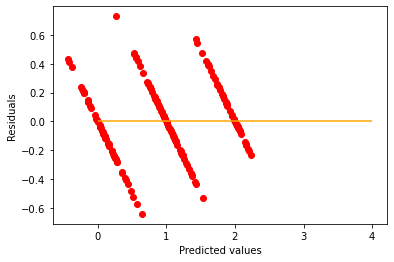

In [57]:
# Homocedasticity
plt.scatter(y= res, x=model.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=4, color='orange')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [59]:
# Ho = Homocedasticity = P > 0.05
# Ha = There's no homocedasticity = p <=0.05

stat, p, f, fp = sms.het_breuschpagan(res, model.model.exog)
print(f'Test stat: {stat}')
print(f'p-Value: {p}')
print(f'F-Value: {f}')
print(f'f_p_value: {fp}')

Test stat: 17.70748130273727
p-Value: 0.1689453440693654
F-Value: 1.3936189225753137
f_p_value: 0.16718628629248083


In [60]:
# Residuals outliers
# It is recommended (rule-of-thumb) that the outliers stay between -3 and 3

outliers = model.outlier_test()

print(outliers.max())
print(outliers.min())

student_resid    3.648035
unadj_p          0.985654
bonf(p)          1.000000
dtype: float64
student_resid   -2.619212
unadj_p          0.000355
bonf(p)          0.063240
dtype: float64
